In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

In [11]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(64,return_sequences=False), input_shape=(28,28)))  # Making SimpleRNN bidirectional
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\KH.EN.P2MCA24148\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │        40,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,762 (167.04 KB)

 Trainable params: 42,762 (167.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8529 - loss: 0.5016 - val_accuracy: 0.9517 - val_loss: 0.1588
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9518 - loss: 0.1610 - val_accuracy: 0.9598 - val_loss: 0.1384
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9617 - loss: 0.1248 - val_accuracy: 0.9608 - val_loss: 0.1294
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9670 - loss: 0.1105 - val_accuracy: 0.9692 - val_loss: 0.1029
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9712 - loss: 0.0982 - val_accuracy: 0.9734 - val_loss: 0.0917
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9729 - loss: 0.0875 - val_accuracy: 0.9756 - val_loss: 0.0813
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9731 - loss: 0.0871 - val_accuracy: 0.9670 - val_loss: 0.1127
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9753 - loss: 0.0794 - val_accuracy: 0.

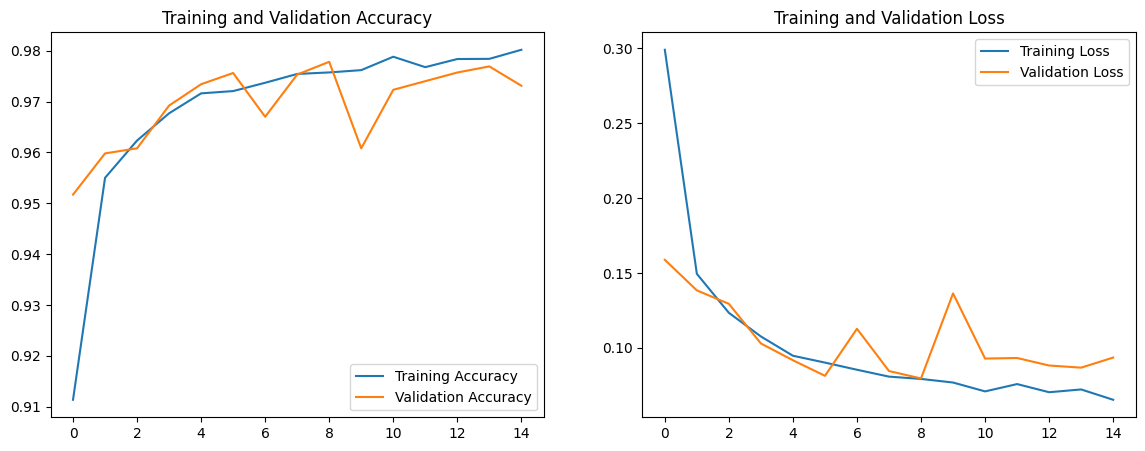

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()